# Matrix = some row vectors

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [4]:
def make_blobs(N=150, k=3, d=2, seed=None):
    """
    Input:
        N: an integer, number of samples
        k: an integer, number of blobs
        d: an integer, dimension of the space
    Output:
        a dataset X of shape (N, d)
    """
    np.random.seed(seed)
    X = np.random.randn(N,d)
    blob_size = N // k
    centers = np.random.randn(k, d) * 3
    for i in range(k):
        left = blob_size * i
        right = blob_size * (i+1) if i != k-1 else N
        X[left:right] += centers[i]
    return X

## Main idea

The **inner product** of two vectors  
$${\bf x} = \begin{bmatrix}x_1\\ \vdots \\ x_n\end{bmatrix}\text{ and }
{\bf y} = \begin{bmatrix}y_1\\ \vdots \\ y_n\end{bmatrix}$$  
is  
$$\langle{\bf x}, {\bf y}\rangle = \sum_{i=1}^n x_iy_i.$$

Let  
$$A = \begin{bmatrix} 
 - & {\bf r}_1 & - \\
 ~ & \vdots & ~ \\
 - & {\bf r}_m & - \\
\end{bmatrix}$$
be an $m\times n$ matrix and ${\bf v}$ a vector in $\mathbb{R}^n$.  

Then  
$$(A{\bf v})_i = \langle{\bf r}_i, {\bf v}\rangle.$$

## Side stories

- Geometry of $\langle{\bf r}, {\bf v}\rangle = k$
- hyperplane, affine plane, and their normal vectors
- `np.random`, `plt.scatter`
- mask in NumPy
- classification

## Experiments

##### Exercise 1
Let 
```python
x = np.array([1,1,1])
y = np.array([1,2,3])
```

###### 1(a)
Use `np.dot` to find the inner product of `x` and `y`.

In [5]:
x = np.array([1,1,1])
y = np.array([1,2,3])
np.dot(x,y)

6

###### 1(b)
Use `*` and `np.sum` to find the inner product of `x` and `y`.

In [6]:
sum(x*y)

6

###### 1(c)
Reshape `y` to `(1,3)` and `x` to `(3,1)` .  
Verify that ${\bf y}^\top{\bf x} = \langle{\bf x}, {\bf y}\rangle$.

In [7]:
x = np.array([1,1,1]).reshape(3,1)
y = np.array([1,2,3]).reshape(1,3)
np.dot(y,x)

array([[6]])

##### Exercise 2
Let  
```python
vs = 5*np.random.randn(2,10000)
r = np.array([1,1])
```

###### 2(a)
Use `plt.scatter` to plot the 10000 points in `vs` and use `plt.arrow` to plot the vector `r` .  
Note:  You might need to set `head_width` properly for drawing an arrow.  
Note:  Put `plt.axis('equal')` at the beginning to make the two axes on the same scale.

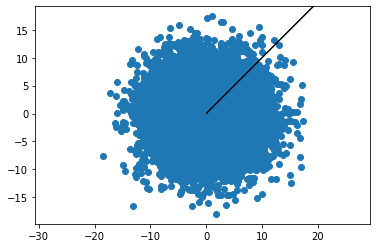

In [8]:
vs = 5*np.random.randn(2,10000)
r = np.array([1,1])

plt.axis('equal')
plt.scatter(vs[0],vs[1])
plt.arrow(0,0,20*r[0],20*r[1])

###### 2(b)
Let `prod = np.dot(r, vs)` .  
Use the `c` and `cmap` keywords in `plt.scatter` to color each points in `vs` by the values in `prod` .

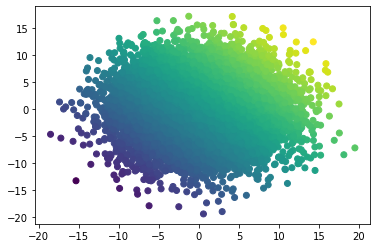

In [9]:
vs = 5*np.random.randn(2,10000)
r = np.array([1,1])
prod = np.dot(r, vs)
plt.scatter(vs[0],vs[1],c=prod)


###### 2(c)
Let 
```python
mask = (np.abs(prod) < 0.1)
plane = vs[:, mask]
```
Plot the points in `plane`.

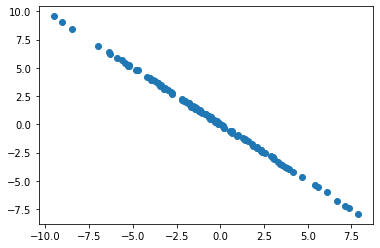

In [21]:
vs = 5*np.random.randn(2,10000)
r = np.array([1,1])
prod = np.dot(r, vs)
mask = (np.abs(prod) < 0.1)
plane = vs[:, mask]
plt.scatter(plane[0],plane[1])

##### Exercise 3
Run the following code.
```python
%matplotlib notebook
vs = 5*np.random.randn(3,100000)
r1 = np.array([1,-1,0])
r2 = np.array([1,0,-1])
r3 = np.array([0,1,-1])
b1,b2,b3 = 5,0,0

mask1 = (np.abs(np.dot(r1, vs) - b1) < 0.1)
mask2 = (np.abs(np.dot(r2, vs) - b2) < 0.1)
mask3 = (np.abs(np.dot(r3, vs) - b3) < 0.1)
plane1 = vs[:,mask1]
plane2 = vs[:,mask2]
plane3 = vs[:,mask3]

ax = plt.axes(projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.scatter(plane1[0], plane1[1], plane1[2])
ax.scatter(plane2[0], plane2[1], plane2[2])
ax.scatter(plane3[0], plane3[1], plane3[2])
```
Does there exist a solution to the system of linear equations?  
$\langle{\bf r}_1, {\bf v}\rangle = b_1$  
$\langle{\bf r}_2, {\bf v}\rangle = b_2$  
$\langle{\bf r}_3, {\bf v}\rangle = b_3$  
Play with other `r`'s and `b`'s.

<IPython.core.display.Javascript object>


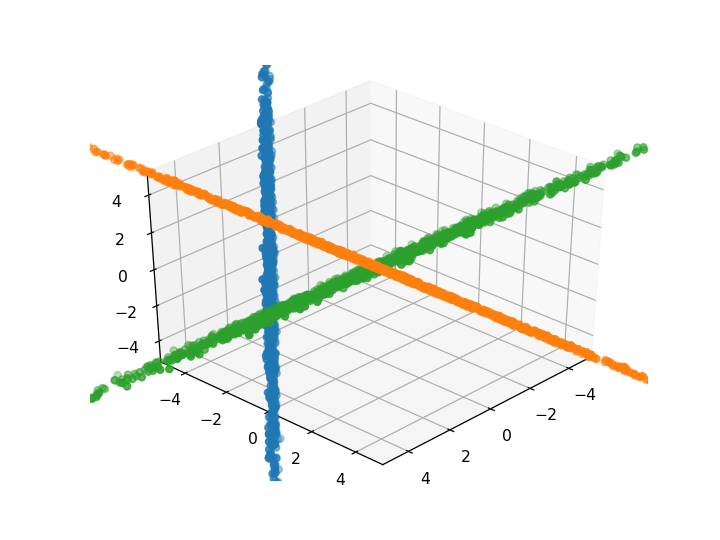

In [22]:
%matplotlib notebook
vs = 5*np.random.randn(3,100000)
r1 = np.array([1,-1,0])
r2 = np.array([1,0,-1])
r3 = np.array([0,1,-1])
b1,b2,b3 = 5,0,0

mask1 = (np.abs(np.dot(r1, vs) - b1) < 0.1)
mask2 = (np.abs(np.dot(r2, vs) - b2) < 0.1)
mask3 = (np.abs(np.dot(r3, vs) - b3) < 0.1)
plane1 = vs[:,mask1]
plane2 = vs[:,mask2]
plane3 = vs[:,mask3]

ax = plt.axes(projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.scatter(plane1[0], plane1[1], plane1[2])
ax.scatter(plane2[0], plane2[1], plane2[2])
ax.scatter(plane3[0], plane3[1], plane3[2])


#否,三平面兩兩交於一線且交線兩兩平行

## Exercises

##### Exercise 4
Let  
```python
x = np.array([0,0,1,1])
y = np.array([1,1,1,1])
```
and $\theta$ the angle between the two vectors.

###### 4(a)
It is known that $\langle{\bf x}, {\bf y}\rangle = \|{\bf x}\|\|{\bf y}\|\cos\theta$ for any vectors, where $\|{\bf v}\| = \sqrt{\langle{\bf v}, {\bf v}\rangle}$ is the length of ${\bf v}$.  
Use `np.arccos` to find $\theta$.

In [12]:
import math
x = np.array([0,0,1,1])
y = np.array([1,1,1,1])

x_len=math.sqrt(np.dot(x,x))
y_len=math.sqrt(np.dot(y,y))
np.arccos(np.dot(x,y)/(x_len*y_len))

0.7853981633974484

###### 4(b)
Let ${\bf z} = {\bf x} - {\bf y}$.  The [law of cosines](https://en.wikipedia.org/wiki/Law_of_cosines) says that  
$$\|{\bf z}\|^2  = \|{\bf x}\|^2 + \|{\bf y}\|^2 - 2\|{\bf x}\|\|{\bf y}\|\cos\theta.$$  
Use the law of cosines to find $\theta$.

In [13]:
import math
import numpy as np
x = np.array([0,0,1,1])
y = np.array([1,1,1,1])
z=x-y
np.arccos((np.dot(x,x)+np.dot(y,y)-np.dot(z,z))/(2*math.sqrt(np.dot(x,x))*math.sqrt(np.dot(y,y))))

0.7853981633974484

##### Exercise 5
Let  
```python
data = np.array([[20, 10], 
                 [16, 1], 
                 [16, 2], 
                 [14, 10], 
                 [13, 5]])
```
where the first colume is the temperature T and the second column is the wind speed V.  
Suppose the apparenet temperature is `AT = 1.04*T - 0.65*V` .  
Generate a boolean array that indicate whether each sample has `AT > 15` or not.

In [14]:
data = np.array([[20, 10], 
                 [16, 1], 
                 [16, 2], 
                 [14, 10], 
                 [13, 5]])
v=np.array([1.04,-0.65])
np.dot(data,v)>15

array([False,  True,  True, False, False])

##### Exercise 6
Let `X = make_blobs(k=2)` .  
Note that `X` has shape `(150,2)` .

###### 6(a)
Consider each row in `X` as a point.  
Use the code below to plot them.  
```python
%matplotlib inline
plt.axis('equal')
plt.scatter(X[:,0], X[:,1])
```

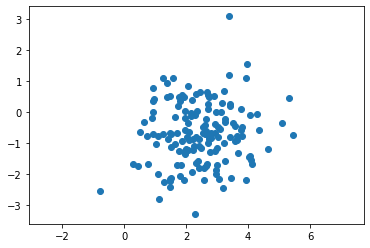

In [15]:
X = make_blobs(k=2)

%matplotlib inline
plt.axis('equal')
plt.scatter(X[:,0], X[:,1])

###### 6(b)
Based on your drawing, do you think there is a affine plane that can separate the two blobs?  
If no, run `X = make_blobs(k=2)` again.  
If yes, find a normal vector `r = np.array([?, ?])` and a bias `b` so that the affine plane $\langle{\bf r}, {\bf x}\rangle = b$ separates the two blobs.  
Use `clr = np.sign(np.dot(X, r) - b)` to color the points.

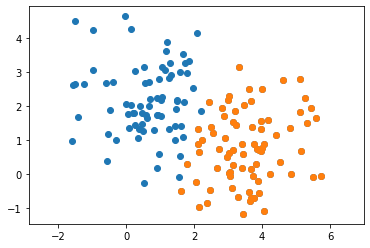

In [20]:
X = make_blobs(k=2)
_x, y = X[:,0], X[:,1]
x = np.vstack([np.ones_like(_x), _x]).T
reg = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
r = np.array([1, reg[1]])
c = X.mean(axis=0)
b = r.dot(c)
clr = np.sign(np.dot(X, r) - b) > 0
plane = X[clr,:]
plt.axis('equal')
plt.scatter(X[:,0], X[:,1])
plt.scatter(plane[:,0], plane[:,1])